## Environment setup

In [2]:
import numpy as np
import os
import sys
from datetime import date,timedelta,datetime
import matplotlib.gridspec as gridspec
import pandas as pd
from sklearn import preprocessing 
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


#read in and filter data
crashes = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
crashes = crashes.tail(579) #limit to 2000s

#build relevant dataframe
op = crashes.loc[:, "Operator"]
ab = crashes.loc[:, "Aboard"]
ft = crashes.loc[:, "Fatalities"]
gd = crashes.loc[:, "Ground"]
tp = crashes.loc[:, "Type"]

rel = pd.DataFrame()
rel["airline"] = op
rel["count"] = 1
rel["aboard"] = ab
rel["fatalities"] = ft
rel["bystanderFatalities"] = gd
rel["aircraftType"] = tp

#remove duplicates and sum values
cld = rel.groupby(rel.airline).sum()
typ = rel.groupby(rel.aircraftType).sum()

#extrapolate data
rto = cld.fatalities/cld.aboard
cld["percentageDead"] = rto
tot = cld.fatalities+cld.bystanderFatalities
cld["totalFatalities"] = tot
trto = typ.fatalities/typ.aboard
typ["percentageDead"] = trto
ttot = typ.fatalities+typ.bystanderFatalities
typ["totalFatalities"] = ttot

#set graph size
plt.rcParams['figure.figsize'] = (12.0, 8.0)


plt.figure(7)
ax = plt.subplot(111)
cld.plot(kind='scatter', x='count', y='totalFatalities',ax=ax, c='percentageDead', title='number of fatalities by number of crashes (excl. 9/11) ')
ax.set_xlim(0,6)
ax.set_ylim(0,400)

FileNotFoundError: [Errno 2] File b'Airplane_Crashes_and_Fatalities_Since_1908.csv' does not exist: b'Airplane_Crashes_and_Fatalities_Since_1908.csv'

In [ ]:
df=pd.read_csv("Airplane_Crashes_and_Fatalities_since_1908.csv")

## Getting familiar with the dataset

In [0]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [0]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [0]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [0]:
df.shape

(5268, 13)

In [0]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

## Data Cleaning

In [0]:
df.shape

(5268, 13)

In [0]:
df.dropna(how='any').shape

(944, 13)

In [0]:
df.dropna(how='all').shape

(5268, 13)

In [0]:
df.dropna(subset=['Time','Flight #','Registration','cn/In','Summary'],how='any').shape

(974, 13)

In [0]:
df=df.drop(columns=['Time','Flight #','Registration','cn/In','Summary'])

In [0]:
df['Location'].value_counts()

Moscow, Russia                                  15
Sao Paulo, Brazil                               15
Rio de Janeiro, Brazil                          14
Anchorage, Alaska                               13
Manila, Philippines                             13
                                                ..
Piura, Peru                                      1
San Dimas, California                            1
Leeward Point Airfield, Guantanamo Bay, Cuba     1
Flamanville, France                              1
Berkeley Springs, West Virginia                  1
Name: Location, Length: 4303, dtype: int64

In [0]:
df['Location'].value_counts(dropna=False)

NaN                                             20
Moscow, Russia                                  15
Sao Paulo, Brazil                               15
Rio de Janeiro, Brazil                          14
Bogota, Colombia                                13
                                                ..
Piura, Peru                                      1
San Dimas, California                            1
Leeward Point Airfield, Guantanamo Bay, Cuba     1
Flamanville, France                              1
Loma Linda, Colombia                             1
Name: Location, Length: 4304, dtype: int64

In [0]:
print(df.Aboard.mean())

27.554517727792604


In [0]:
df['Aboard'].fillna(value=df.Aboard.mean(),inplace=True)

In [0]:
df['Ground'].fillna(0,inplace=True)

In [0]:
df['Fatalities'].fillna(df['Aboard'])

0         1.0
1         5.0
2         1.0
3        14.0
4        30.0
        ...  
5263     98.0
5264      4.0
5265    228.0
5266      1.0
5267     13.0
Name: Fatalities, Length: 5268, dtype: float64

In [0]:
df['Date'].fillna(method='pad')

0       09/17/1908
1       07/12/1912
2       08/06/1913
3       09/09/1913
4       10/17/1913
           ...    
5263    05/20/2009
5264    05/26/2009
5265    06/01/2009
5266    06/07/2009
5267    06/08/2009
Name: Date, Length: 5268, dtype: object

In [0]:
df['Operator'].value_counts()

df.Operator.ffill(axis='rows',inplace=True)

df.isnull().sum()

Date             0
Location        20
Operator         0
Route         1706
Type            27
Aboard           0
Fatalities      12
Ground           0
dtype: int64

In [0]:
df['Location'].value_counts()

df.Location.ffill(axis='rows',inplace=True)

df.isnull().sum()


Date             0
Location         0
Operator         0
Route         1706
Type            27
Aboard           0
Fatalities      12
Ground           0
dtype: int64

In [0]:
df['Route'].value_counts()

df.Route.ffill(axis='rows',inplace=True)

df.isnull().sum()

Date           0
Location       0
Operator       0
Route          0
Type          27
Aboard         0
Fatalities    12
Ground         0
dtype: int64

In [0]:
df.Type.ffill(axis='rows',inplace=True)
df.isnull().sum()

Date           0
Location       0
Operator       0
Route          0
Type           0
Aboard         0
Fatalities    12
Ground         0
dtype: int64

In [0]:
df.loc[df['Fatalities'].isnull(),'Fatalities']=df['Aboard']
df.isnull().sum()

Date          0
Location      0
Operator      0
Route         0
Type          0
Aboard        0
Fatalities    0
Ground        0
dtype: int64

In [0]:
df

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Test flight,Curtiss seaplane,1.0,1.0,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Test flight,Zeppelin L-1 (airship),20.0,14.0,0.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Test flight,Zeppelin L-2 (airship),30.0,30.0,0.0
...,...,...,...,...,...,...,...,...
5263,05/20/2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,112.0,98.0,2.0
5264,05/26/2009,"Near Isiro, DemocratiRepubliCongo",Service Air,Goma - Isiro,Antonov An-26,4.0,4.0,0.0
5265,06/01/2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,228.0,228.0,0.0
5266,06/07/2009,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,1.0,1.0,0.0


## Data Visualisation

In [ ]:
dataset = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
dataset.shape
dataset.head()
dataset.columns = dataset.columns.str.lower()
dataset.head()
dataset.info()
operator = dataset['operator'].value_counts()
operator
locations = dataset['location'].value_counts()
locations
time = dataset['time'].value_counts()
print(time[time == 1].count())
print(time[time == 2].count())
print(time[time == 3].count())
print(time[time == 4].count())
print(time[time == 5].count())
time_count = time[time >4]

plt.figure(figsize=(10,8))
time_count.plot()
plt.ylabel("Frequency")
plt.xlabel("time count")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [0]:
df.Operator = df.Operator.str.upper()
df.Operator = df.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')
Total_by_Op = df.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={"Operator": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index, x="Count", data=Total_by_Op, palette="gist_heat", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Opeartor', loc='Center', fontsize=14)
plt.show()


In [0]:
Prop_by_Op = df.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, palette="gist_gray", orient='h')
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()


In [0]:
for time in time_count.index:
    time_data = dataset[dataset['time'] == time][['time','location','operator','route']]
    time_data_freq = time_data['operator'].value_counts()
    air_force = time_data_freq.index.str.contains("Air Force",regex=True)
    air_force_count = time_data['operator'].value_counts()[air_force].count()
    private_air_count = time_data['operator'].value_counts().count()-time_data['operator'].value_counts()[air_force].count()
    acc_dic = {"time": time, "Air Force":air_force_count,"private air company": private_air_count}
    accident_data.append(acc_dic)
    if air_force_count > private_air_count:
        accident_data1_bool.append("Air Force")
    else:
        accident_data_bool.append("Private Air")
       
       
        accident_data[0:10]
       
accident_data_bool_ser = pd.Series(accident_data_bool)
accident_data_bool_ser.value_counts().plot.bar(figsize=(5,4), rot=45)
plt.ylabel("Occurrence Count")
plt.xlabel(" Private air company")
plt.title("Frequency Graph for Private air company and Air Force")
plt.show()

In [0]:
#read in and filter data
crashes = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
crashes = crashes.tail(579) #limit to 2000s

#build relevant dataframe
op = crashes.loc[:, "Operator"]
ab = crashes.loc[:, "Aboard"]
ft = crashes.loc[:, "Fatalities"]
gd = crashes.loc[:, "Ground"]
tp = crashes.loc[:, "Type"]

rel = pd.DataFrame()
rel["airline"] = op
rel["count"] = 1
rel["aboard"] = ab
rel["fatalities"] = ft
rel["bystanderFatalities"] = gd
rel["aircraftType"] = tp

#remove duplicates and sum values
cld = rel.groupby(rel.airline).sum()
typ = rel.groupby(rel.aircraftType).sum()

#extrapolate data
rto = cld.fatalities/cld.aboard
cld["percentageDead"] = rto
tot = cld.fatalities+cld.bystanderFatalities
cld["totalFatalities"] = tot
trto = typ.fatalities/typ.aboard
typ["percentageDead"] = trto
ttot = typ.fatalities+typ.bystanderFatalities
typ["totalFatalities"] = ttot

#set graph size
plt.rcParams['figure.figsize'] = (12.0, 8.0)


plt.figure(7)
ax = plt.subplot(111)
cld.plot(kind='scatter', x='count', y='totalFatalities',ax=ax, c='percentageDead', title='number of fatalities by number of crashes (excl. 9/11) ')
ax.set_xlim(0,6)
ax.set_ylim(0,400)

## Data Normalization

In [0]:
print("Before Normalization X values are \n")
df["Fatalities"]

Before Normalization X values are 



0         1.0
1         5.0
2         1.0
3        14.0
4        30.0
        ...  
5263     98.0
5264      4.0
5265    228.0
5266      1.0
5267     13.0
Name: Fatalities, Length: 5268, dtype: float64

In [0]:
print("Mean:",df["Fatalities"].mean())
print("Median:",df["Fatalities"].median())
print("Variance:",df["Fatalities"].var())
print("Standard Deviation",math.sqrt(df["Fatalities"].var()))

Mean: 20.08535577310811
Median: 9.0
Variance: 1099.8529463212901
Standard Deviation 33.16403091183715


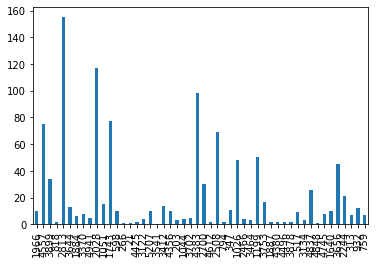

In [0]:
df["Fatalities"].sample(50).plot(kind="bar")

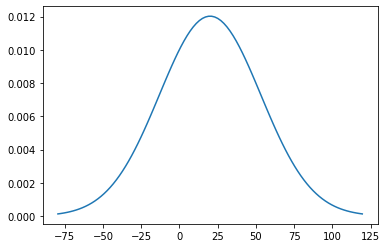

In [0]:
mean_fatalities= df['Fatalities'].mean()
variance_fatalities = df['Fatalities'].var()
sd_fatalities = math.sqrt(variance_fatalities)
x = np.linspace(mean_fatalities - 3*sd_fatalities,mean_fatalities + 3*sd_fatalities, 100)
plt.plot(x, stats.norm.pdf(x, mean_fatalities, sd_fatalities))
plt.show()

In [0]:
standardScalerX = preprocessing.StandardScaler(copy=True,with_mean=True,with_std=True)

x_scaled=df["Fatalities"].values.reshape(-1,1)

x_scaled = standardScalerX.fit_transform(x_scaled)

df_normalized=pd.DataFrame(x_scaled,columns=["Fatalities"])

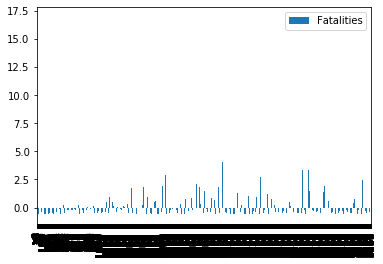

In [0]:
df_normalized.plot(kind="bar")

In [0]:
x = df[['Fatalities']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df_normalized = pd.DataFrame(x_scaled,columns=["Fatalities"])

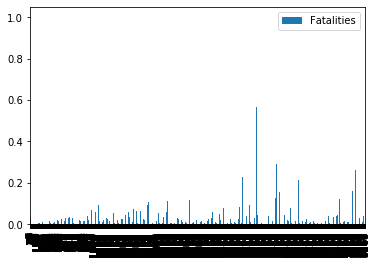

In [0]:
df_normalized.plot(kind='bar')

In [0]:
robust_scaler = preprocessing.RobustScaler()
x_scaled=df["Fatalities"].values.reshape(-1,1)
df_normalized = robust_scaler.fit_transform(x_scaled)
df_normalized = pd.DataFrame(df_normalized, columns=['Fatalities'])

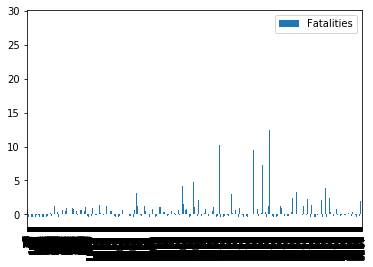

In [0]:
df_normalized.plot(kind="bar")

In [0]:
scaler = preprocessing.Normalizer()
x=pd.DataFrame({"Fatalities":df["Fatalities"].astype(float),"Aboard":df["Aboard"].astype(float)})

In [0]:
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=x.columns)

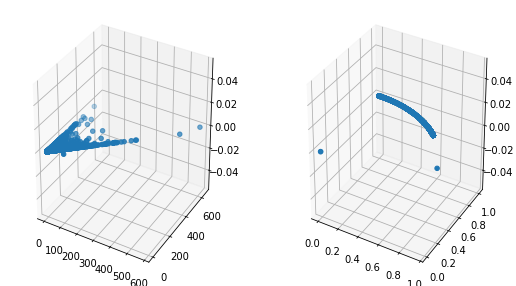

In [0]:
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df["Fatalities"],df["Aboard"])
ax2.scatter(scaled_df['Fatalities'],scaled_df["Aboard"])
plt.show()

## Hypothesis Testing

In [0]:
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(stats.norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/math.sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False

In [0]:
alpha = 0.05
sample_mean = df["Fatalities"].sample(n=500).mean()
pop_mean = df['Fatalities'].mean()
sample_size=500
variance=df["Fatalities"].var()
std_dev=math.sqrt(variance)
print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ = 20.08535577310811
H1 : μ != 20.08535577310811
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : -0.7115682817296735 

Failed to reject NULL hypothesis


## Correlation

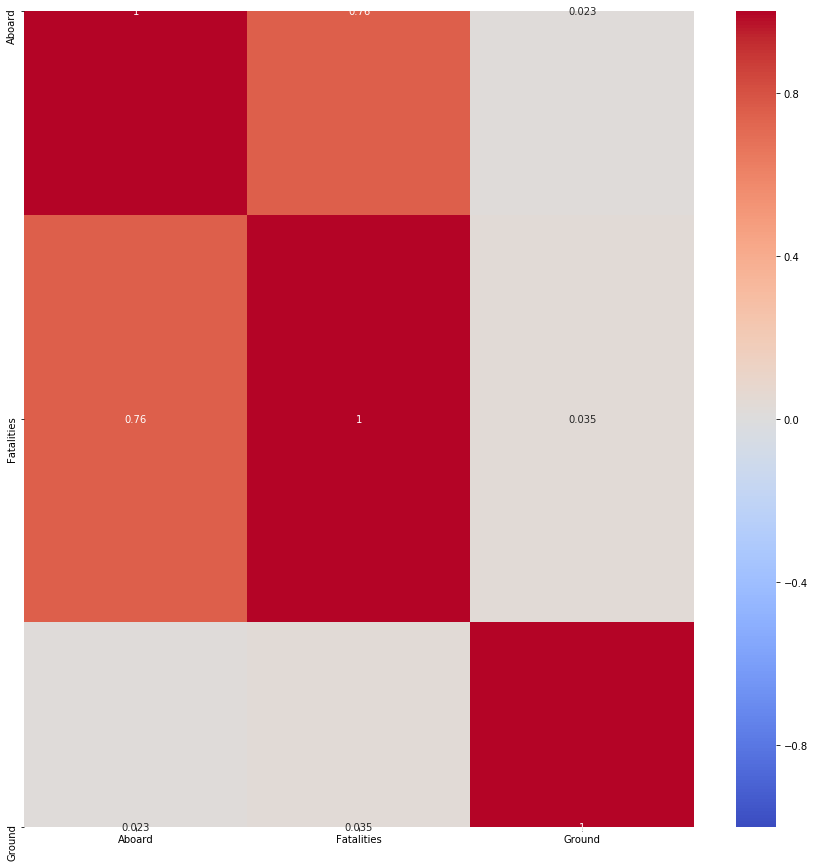

In [0]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);